# Lab 8

In [1]:
FIRST_NAME = "Leng"
LAST_NAME = "Her"
STUDENT_ID = "5445877"

## Introduction

In this lab, we will build machine learning models for Optical Character Recognition ([OCR](htthttps://en.wikipedia.org/wiki/Optical_character_recognitionps://)), which is a computer vision problem for identifying written or typed characters within an image. We will use the MNIST data set of hand written digits (0-9).

First, we will build a logitic regression model for each digit. We can think of these models as _like a 0 layer neural network_ - each input gets multiplied by 1 coeficient then the results are added together and passed through 1 activation function.

Then we will add in a hidden layer to build a simple Feed-Forward Neural Network with the Scikit Learn MLPClassifier model. We will compare the accuracy of predicting each individual digit, and the data set overall.

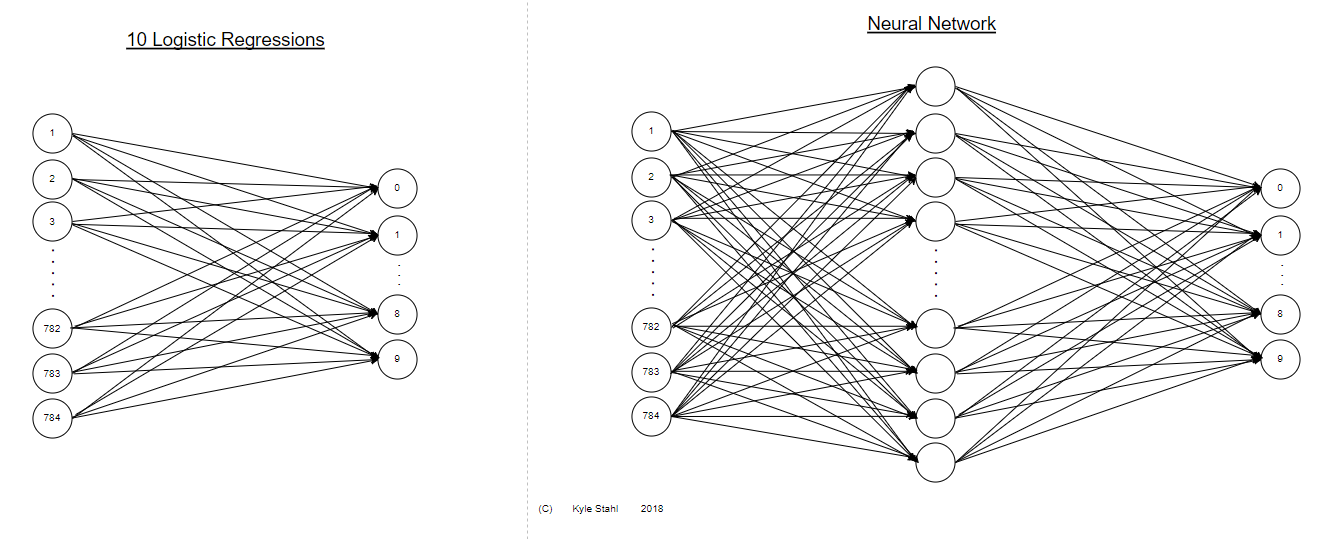

There are many free tutorials online that you can use to help with this lab. Here are some examples:
 * [Recognizing hand-written digits](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) by Scikit-Learn
 * [MNIST SciKit-Learn Tutorial](https://www.kaggle.com/code/gainknowledge/mnist-scikit-learn-tutorial) on Kaggle
 * [Digit Classification with Sklearn](https://notebook.community/jbocharov-mids/W207-Machine-Learning/John_Bocharov_p1) on notebook.community
 * [Handwritten Digit Recognition with scikit-learn](https://thedatafrog.com/en/articles/handwritten-digit-recognition-scikit-learn/) by the Data Frog

## The Data Set

**Data Description**

The MNIST data set is a standard data set for machine learning and computer vision. NIST stands for the **N**ational **I**nstitute for **S**tandards and **T**echnology, which created a data set of hand written digits from high school students and the US Census Bureau. MNIST is the **M**odified version of that data set which standardized all the images to 28x28 pixel greyscale images.

This data set is commonly used as an introduction to neural networks, deep learning, computer vision, and optical character recognition (OCR).

**Data Dictionary**

| Column Name | Type | Description |
| :----------- | :-- | :----------- |
| 0 | `int` | Digit of the image (0-9) |
| 1-784 | `float` | Darkness of the pixel (0-255) |

 * Each row represents 1 image
 * Each column is a specific pixel location
 * The values of the data frame are how dark/light each pixel in the image is (0-255)

**Data Sample**

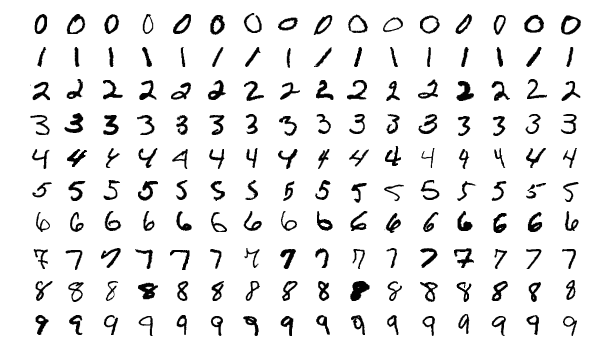

## Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Question 1

Read in the CSV file named mnist_train_small.csv from the sample_data folder of the Colab Notebook into a Pandas DataFrame with the `pd.read_csv()` [function](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). Use the `header=None` argument. Save the DataFrame into a variable named `mnist_train_df`.

In [7]:
mnist_train_df = pd.read_csv("sample_data/mnist_train_small.csv", header = None)

In [8]:
mnist_train_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Question 2

Print out one of the images using pyplot from matplotlib.
* Select 1 row of the DataFrame with columns 1-784 using the .loc[ ] [attribute](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html). It does not matter which row.
* Transform the resulting row of the DataFrame into a Numpy array using the `.values` [attribute](https://pandas.pydata.org/docs/reference/api/pandas.Series.values.html), then reshape it into a 28 x 28 2-dimensional array with the `.reshape()` [method](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).
* Use the `plt.imshow()` [function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) with `cmap='grey'` to print out the greyscale image.

In [14]:
pixels = mnist_train_df.loc[0, 1:784].values.reshape(28,28)

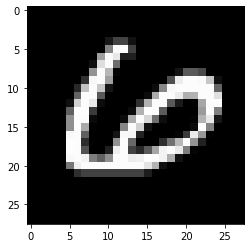

In [16]:
plt.imshow(pixels, cmap = "gray")

### Question 3

**What does the typical or _"average"_ digit look like for every number 0-9?**

First, for each digit 0-9, take the average brightness of each pixel location 1-784. The easiest way to do this is with the `.groupby(0)` [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) to group by the column named `0`. Then take the `.mean()` of the resulting DataFrame to get the average of every column for each group. Save the result into a variable named `pixel_averages`.

Then define a function called `show_number(n: int)` that takes in an integer input between 0 and 9, and prints out that row of the `pixel_averages` DataFrame as an image (like in the previous question).

In [18]:
pixel_averages = mnist_train_df.groupby(0).mean()

In [23]:
def show_number(n:int):

  pixels_ = pixel_averages.loc[n,].values.reshape(28,28)
  plt.imshow(pixels_, cmap = "gray")
  plt.show()
  return None

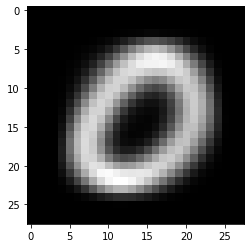

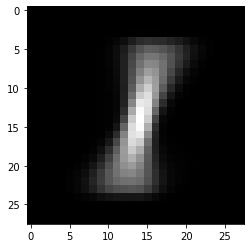

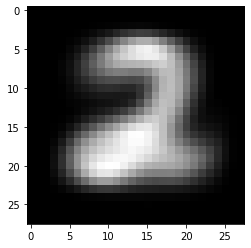

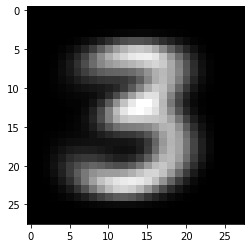

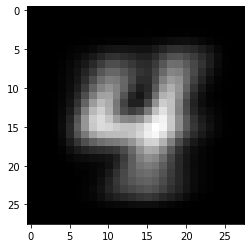

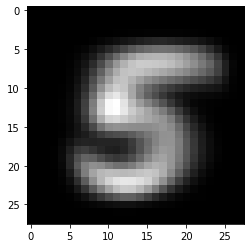

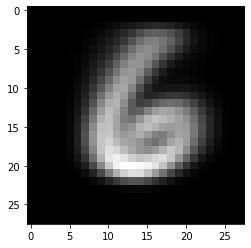

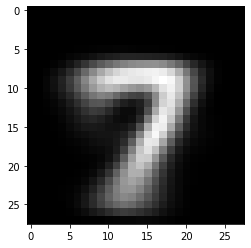

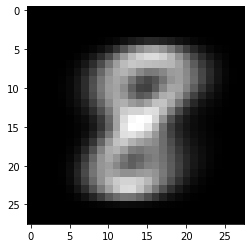

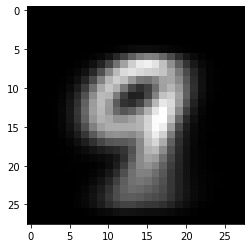

In [24]:
for n in range(10):
  show_number(n)

## Logistic Regressions

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [26]:
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelBinarizer

### Question 4

Preprocess the training data to build a logisitc regression model for each digit.

**Features**  
The features for these models will be the brightness of each pixel in columns 1-784. We will scale the values to be between 0 and 1. Because the values are all already within the same range (0-255) we do not need to use any preprocessing tools from Scikit Learn. We can just divide all the values by 255. Save the result into a DataFrame named `X_train`.

**Labels**  
We will be training 10 different models, one for each digit. So we need 10 different label variables (y). Create a Pandas Series with binary values for each digit 0-9 named y0, y1, y2, etc. where each value represents if the digit in that image corresponds to that number.

**_Labels Example_**

| 0 (label column in mnist_train_df) | ... | y0 | ... | y3 | ... | y8 |
| - | --- | -- | --- | -- | --- | -- |
| 6 | ... | 0  | ... | 0  | ... | 0  |
| 3 | ... | 0  | ... | 1  | ... | 0  |
| 2 | ... | 0  | ... | 0  | ... | 0  |
| 8 | ... | 0  | ... | 0  | ... | 1  |
| 0 | ... | 1  | ... | 0  | ... | 0  |

In [29]:
X_train = mnist_train_df.loc[:,1:784] / 255

In [45]:
y0= (mnist_train_df[0] == 0).astype(int)
y1= (mnist_train_df[0] == 1).astype(int)
y2= (mnist_train_df[0] == 2).astype(int)
y3= (mnist_train_df[0] == 3).astype(int)
y4= (mnist_train_df[0] == 4).astype(int)
y5= (mnist_train_df[0] == 5).astype(int)
y6= (mnist_train_df[0] == 6).astype(int)
y7= (mnist_train_df[0] == 7).astype(int)
y8= (mnist_train_df[0] == 8).astype(int)
y9= (mnist_train_df[0] == 9).astype(int)

### Question 5

Run 10 grid search cross validations to hyper parameter tune logisitic regression models for each digit. They should all be exactly the same, _except for the label variable used to fit them._

The [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) should have the following parameters:
* penalty = "l2"
* tol = 0.01
* max_iter = 1000
* C should be in the parameter grid for the grid search. Try the values [0.75, 1.00, 1.25]

The [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) should use the following parameters
* cv = 3
* scoring = 'accuracy'
* refit = True

In [36]:
lr = LogisticRegression(penalty = "l2", tol = 0.01, max_iter= 1000)

In [38]:
param_grid = {
    "C": [0.75, 1.00, 1.25]
}

In [46]:
y0_cv = GridSearchCV(lr,param_grid=param_grid,cv = 3, scoring = "accuracy", refit = True).fit(X_train, y0)
y1_cv = GridSearchCV(lr,param_grid=param_grid,cv = 3, scoring = "accuracy", refit = True).fit(X_train, y1)
y2_cv = GridSearchCV(lr,param_grid=param_grid,cv = 3, scoring = "accuracy", refit = True).fit(X_train, y2)
y3_cv = GridSearchCV(lr,param_grid=param_grid,cv = 3, scoring = "accuracy", refit = True).fit(X_train, y3)
y4_cv = GridSearchCV(lr,param_grid=param_grid,cv = 3, scoring = "accuracy", refit = True).fit(X_train, y4)
y5_cv = GridSearchCV(lr,param_grid=param_grid,cv = 3, scoring = "accuracy", refit = True).fit(X_train, y5)
y6_cv = GridSearchCV(lr,param_grid=param_grid,cv = 3, scoring = "accuracy", refit = True).fit(X_train, y6)
y7_cv = GridSearchCV(lr,param_grid=param_grid,cv = 3, scoring = "accuracy", refit = True).fit(X_train, y7)
y8_cv = GridSearchCV(lr,param_grid=param_grid,cv = 3, scoring = "accuracy", refit = True).fit(X_train, y8)
y9_cv = GridSearchCV(lr,param_grid=param_grid,cv = 3, scoring = "accuracy", refit = True).fit(X_train, y9)


### Question 6

First, get the predictions for all 10 models on the training data set using the `.predict()` [function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.predict).

Then calculate and print out the precision, recall, and F1-score performance metrics for each model. The easiest way to do this is with the `sklearn.metrics.precision_recall_fscore_support` [function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support).

In [51]:
pred0 = y0_cv.predict(X_train)
pred1 = y1_cv.predict(X_train)
pred2 = y2_cv.predict(X_train)
pred3 = y3_cv.predict(X_train)
pred4 = y4_cv.predict(X_train)
pred5 = y5_cv.predict(X_train)
pred6 = y6_cv.predict(X_train)
pred7 = y7_cv.predict(X_train)
pred8 = y8_cv.predict(X_train)
pred9 = y9_cv.predict(X_train)

In [56]:
print(0,precision_recall_fscore_support(y0,pred0))
print(1,precision_recall_fscore_support(y1,pred1))
print(2,precision_recall_fscore_support(y2,pred2))
print(3,precision_recall_fscore_support(y3,pred3))
print(4,precision_recall_fscore_support(y4,pred4))
print(5,precision_recall_fscore_support(y5,pred5))
print(6,precision_recall_fscore_support(y6,pred6))
print(7,precision_recall_fscore_support(y7,pred7))
print(8,precision_recall_fscore_support(y8,pred8))
print(9,precision_recall_fscore_support(y9,pred9))

0 (array([0.99662368, 0.98344542]), array([0.99822597, 0.96890928]), array([0.99742418, 0.97612323]), array([18038,  1962]))
1 (array([0.99684596, 0.97416481]), array([0.99673368, 0.97503344]), array([0.99678982, 0.97459893]), array([17757,  2243]))
2 (array([0.98625165, 0.95759912]), array([0.99572483, 0.8743087 ]), array([0.9909656 , 0.91406045]), array([18011,  1989]))
3 (array([0.98305178, 0.93760263]), array([0.99365927, 0.8476002 ]), array([0.98832706, 0.89033264]), array([17979,  2021]))
4 (array([0.99040741, 0.94035465]), array([0.99385926, 0.90956341]), array([0.99213033, 0.92470277]), array([18076,  1924]))
5 (array([0.98334599, 0.9284802 ]), array([0.99385931, 0.82566723]), array([0.9885747 , 0.87406072]), array([18239,  1761]))
6 (array([0.99428159, 0.97384306]), array([0.99710484, 0.94948504]), array([0.99569121, 0.96150981]), array([17961,  2039]))
7 (array([0.991695  , 0.96017484]), array([0.99541233, 0.92991533]), array([0.99355019, 0.94480287]), array([17874,  2126]))


## Neural Network

### Question 7

Train a neural network to classify the digits using the Scikit Learn [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) algorithm. You do not need to change any of the default hyperparameters.

We can use the same `X_train` features from the Logisitic Regressions above, but we will need to reprocess the label variables. 
* First, create a `LabelBinarizer()` [object](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html?highlight=labelbinarizer#sklearn.preprocessing.LabelBinarizer)
* Then run the `.fit_transform()` method of that object on the label column _(0)_ of the training dataset. Save the results into a variable named `y`.

Then fit the MLPClassifier using the `X_train` features and `y` label.

In [54]:
label_binarizer = LabelBinarizer()

In [55]:
y = label_binarizer.fit_transform(mnist_train_df[0])

In [58]:
mlp = MLPClassifier()

In [59]:
mlp_fitted = mlp.fit(X_train,y)

### Question 8

First, get the predictions from your MLPClassifier on the training data set using the `.predict()` [function](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.predict).

Then calculate and print out the precision, recall, and F1-score performance metrics of the model for each digit. The easiest way to do this is with the `sklearn.metrics.classification_report` [function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report).

In [60]:
preds = mlp_fitted.predict(X_train)

In [63]:
print(classification_report(y, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1962
           1       1.00      1.00      1.00      2243
           2       1.00      1.00      1.00      1989
           3       1.00      1.00      1.00      2021
           4       1.00      1.00      1.00      1924
           5       1.00      1.00      1.00      1761
           6       1.00      1.00      1.00      2039
           7       1.00      1.00      1.00      2126
           8       1.00      1.00      1.00      1912
           9       1.00      1.00      1.00      2023

   micro avg       1.00      1.00      1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000
 samples avg       1.00      1.00      1.00     20000



## Evaluating on the test data set

### Question 9

Repeat Question 6 (getting predictions and evaluation metrics for the Logistic Regressions) for the testing data set `mnist_test_df`.

_Make sure to repeat the data preprocessing step for the feature variables!_

In [98]:
mnist_test_df = pd.read_csv("sample_data/mnist_test.csv", header = None)

In [99]:
mnist_test_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
X_test = mnist_test_df.loc[:,1:784] / 255

In [101]:
y0= (mnist_test_df[0] == 0).astype(int)
y1= (mnist_test_df[0] == 1).astype(int)
y2= (mnist_test_df[0] == 2).astype(int)
y3= (mnist_test_df[0] == 3).astype(int)
y4= (mnist_test_df[0] == 4).astype(int)
y5= (mnist_test_df[0] == 5).astype(int)
y6= (mnist_test_df[0] == 6).astype(int)
y7= (mnist_test_df[0] == 7).astype(int)
y8= (mnist_test_df[0] == 8).astype(int)
y9= (mnist_test_df[0] == 9).astype(int)

In [102]:
pred0 = y0_cv.predict(X_test)
pred1 = y1_cv.predict(X_test)
pred2 = y2_cv.predict(X_test)
pred3 = y3_cv.predict(X_test)
pred4 = y4_cv.predict(X_test)
pred5 = y5_cv.predict(X_test)
pred6 = y6_cv.predict(X_test)
pred7 = y7_cv.predict(X_test)
pred8 = y8_cv.predict(X_test)
pred9 = y9_cv.predict(X_test)

In [103]:
print(0,precision_recall_fscore_support(y0,pred0))
print(1,precision_recall_fscore_support(y1,pred1))
print(2,precision_recall_fscore_support(y2,pred2))
print(3,precision_recall_fscore_support(y3,pred3))
print(4,precision_recall_fscore_support(y4,pred4))
print(5,precision_recall_fscore_support(y5,pred5))
print(6,precision_recall_fscore_support(y6,pred6))
print(7,precision_recall_fscore_support(y7,pred7))
print(8,precision_recall_fscore_support(y8,pred8))
print(9,precision_recall_fscore_support(y9,pred9))

0 (array([0.99501275, 0.95701126]), array([0.99534368, 0.95408163]), array([0.99517819, 0.9555442 ]), array([9020,  980]))
1 (array([0.99627666, 0.96921724]), array([0.99605189, 0.97092511]), array([0.99616426, 0.97007042]), array([8865, 1135]))
2 (array([0.98324884, 0.95032397]), array([0.99487065, 0.85271318]), array([0.98902561, 0.8988764 ]), array([8968, 1032]))
3 (array([0.9829947 , 0.90677966]), array([0.99021135, 0.84752475]), array([0.98658983, 0.87615148]), array([8990, 1010]))
4 (array([0.98819506, 0.93482906]), array([0.99323575, 0.8910387 ]), array([0.99070899, 0.91240876]), array([9018,  982]))
5 (array([0.9819624 , 0.91091593]), array([0.99220466, 0.81390135]), array([0.98705696, 0.85968028]), array([9108,  892]))
6 (array([0.99127843, 0.93312102]), array([0.99303251, 0.91753653]), array([0.9921547 , 0.92526316]), array([9042,  958]))
7 (array([0.98933689, 0.93480441]), array([0.99275524, 0.90661479]), array([0.99104312, 0.92049383]), array([8972, 1028]))
8 (array([0.9710

### Question 10

Repeat Question 8 (getting predictions and evaluation metrics for the MLPClassifer) for the testing data set `mnist_test_df`.

_Make sure to repeat the data preprocessing step for the feature variables!_

In [105]:
preds_test = mlp_fitted.predict(X_test)

In [107]:
y_test = label_binarizer.fit_transform(mnist_test_df[0])

In [108]:
print(classification_report(y_test, preds_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.97      0.96      0.96      1032
           3       0.96      0.94      0.95      1010
           4       0.97      0.96      0.96       982
           5       0.97      0.94      0.95       892
           6       0.98      0.95      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.97      0.94      0.95       974
           9       0.96      0.95      0.95      1009

   micro avg       0.97      0.96      0.96     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000
 samples avg       0.95      0.96      0.95     10000



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
